In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 1
Utilize o conjunto de dados [Go To College Dataset](https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset) ou um conjunto de dados de **classificação supervisionada** de sua escolha.

In [192]:
df_gotocollege = pd.read_csv('GoToCollege.csv')
df = df_gotocollege.copy()

df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


# 2
Realize uma Análise Exploratória de Dados.

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [178]:
df.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [179]:
#df['gender'].unique()[0]

for col in df.columns:
  if type(df[col].unique()[-1]) is not np.float64:
    if type(df[col].unique()[-1]) is not np.int64:
      if type(df[col].unique()[-1]) is not np.bool_:
        col_new = col
        
        print('Col Categorica:', col_new)

Col Categorica: type_school
Col Categorica: school_accreditation
Col Categorica: gender
Col Categorica: interest
Col Categorica: residence


# 3
Caso algum dado seja categórico, transforme para númerico.

In [180]:
df[['type_school', 'school_accreditation', 'gender', 'interest', 'residence', 'parent_was_in_college','will_go_to_college']].head(30)

,type_school,school_accreditation,gender,interest,residence,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,False,True
1,Academic,A,Male,Less Interested,Urban,False,True
2,Academic,B,Female,Very Interested,Urban,False,True
3,Vocational,B,Male,Very Interested,Rural,True,True
4,Academic,A,Female,Very Interested,Urban,False,False
5,Vocational,B,Female,Less Interested,Rural,True,False
6,Academic,A,Male,Very Interested,Rural,True,True
7,Academic,B,Male,Very Interested,Rural,True,False
8,Academic,B,Female,Uncertain,Rural,True,True
9,Academic,B,Female,Very Interested,Rural,True,False


In [181]:
for i in df['type_school']:
    type_school = df['type_school'].replace(['Academic','Vocational'],['0','1'])
    df['type_school'] = type_school

for i in df['school_accreditation']:
    school_accreditation = df['school_accreditation'].replace(['A','B'],['0','1'])
    df['school_accreditation'] = school_accreditation

for i in df['gender']:
    gender = df['gender'].replace(['Male','Female'],['0','1'])
    df['gender'] = gender

for i in  df['interest']:
    interest = df['interest'].replace(['Uncertain','Not Interested','Interested','Less Interested','Very Interested'], ['0', '1', '2', '3','4'])
    df['interest'] = interest

for i in df['residence']:
    residence = df['residence'].replace(['Rural','Urban'], ['0','1'])
    df['residence'] = residence
                                              
df['parent_was_in_college']  = df['parent_was_in_college'].map({True:1, False:0})
df['will_go_to_college']  = df['will_go_to_college'].map({True:1, False:0})


In [182]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,0,3,1,56,6950000,83.0,84.09,0,1
1,0,0,0,3,1,57,4410000,76.8,86.91,0,1
2,0,1,1,4,1,50,6500000,80.6,87.43,0,1
3,1,1,0,4,0,49,6600000,78.2,82.12,1,1
4,0,0,1,4,1,57,5250000,75.1,86.79,0,0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   int64  
 10  will_go_to_college     1000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


# 4
Divida os dados em treino/teste utilizando a técnica hold-out. Escolha uma porcentagem para treino/teste (mais utilizadas: 90/10, 80/20, 75/25, 70/30, 50/50).

In [184]:
X = df.drop(columns=['will_go_to_college'])
y = df['will_go_to_college'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) #70/30

# 5

Realize a classificação utilizando o KNN.

In [185]:
knn = KNeighborsClassifier(3)

fit = knn.fit(X_train, y_train)
predict = knn.predict(X_test)

# 6


Plot a [matriz de confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay). Outra biblioteca interessante para o plot é a seaborn [exemplo de uso](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea).

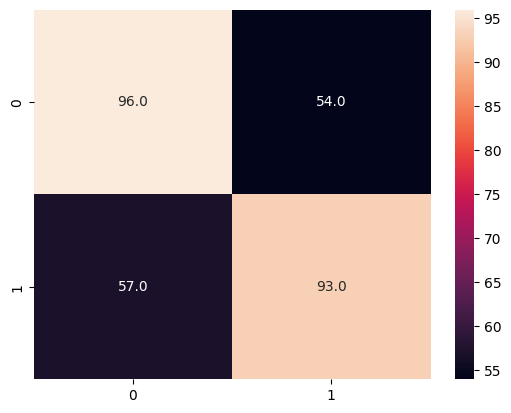

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

m_c = confusion_matrix(y_test, predict)
m_c
sns.heatmap(m_c, annot=True, fmt='.01f');

Elemento na posição (0,0): representa a quantidade de classificações Verdadeiros Positivos, ou seja, a quantidade de vezes que o modelo acertou a predição positiva conforme os dados reais.

Elemento na posição (0,1): representa a quantidade de classificações Falsos Negativos, ou seja, a quantidade de vezes que o modelo previu incorretamente um resultado como negativo.

Elemento na posição (1,0): representa a quantidade de classificações Falsos Positivos, ou seja, a quantidade de vezes que o modelo previu incorretamente um resultado como positivo.

Elemento na posição (1,1): representa a quantidade de classificações Verdadeiros Negativos, ou seja, a quantidade de vezes que o modelo acertou a predição negativa conforme os dados reais.

# 7

Calcule a acurácia, F1-score, recall, precision.

Acurácia: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;

Precisão: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;

Recall/Revocação/Sensibilidade: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;

F1-Score: média harmônica entre precisão e recall.

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, predict))
print(precision_score(y_test, predict))
print(recall_score(y_test, predict))
print(f1_score(y_test, predict))

0.63
0.6326530612244898
0.62
0.6262626262626263


# 8

Exiba o [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [188]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))



              precision    recall  f1-score   support

           0       0.63      0.64      0.63       150
           1       0.63      0.62      0.63       150

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300



# 9

Realize vários experimentos. Modifique a quantidade de vizinhos (parametro n_neighbors), e crie um plot (k vs acurácia).

Acuracias com K= 3, K= 11, K= 27: [0.63, 0.7033333333333334, 0.7233333333333334]


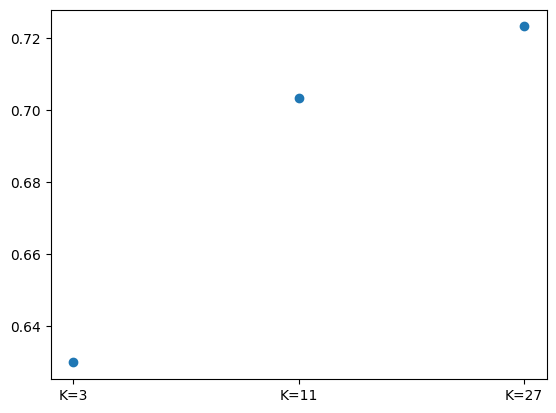

In [189]:
import matplotlib.pyplot as plt

knn_3 = KNeighborsClassifier(3)
fit_3 = knn_3.fit(X_train, y_train)
predict_3 = knn_3.predict(X_test)

knn_7 = KNeighborsClassifier(7)
fit_7 = knn_7.fit(X_train, y_train)
predict_7 = knn_7.predict(X_test)

knn_11 = KNeighborsClassifier(11)
fit_11 = knn_11.fit(X_train, y_train)
predict_11 = knn_11.predict(X_test)

knn_27 = KNeighborsClassifier(27)
fit_27 = knn_27.fit(X_train, y_train)
predict_27 = knn_27.predict(X_test)

acuracia_3 = accuracy_score(y_test, predict_3)
acuracia_7 = accuracy_score(y_test, predict_7)
acuracia_11 = accuracy_score(y_test, predict_11)
acuracia_27 = accuracy_score(y_test, predict_27)

names = ['K=3', 'K=11', 'K=27']
values = [acuracia_3, acuracia_11, acuracia_27]
print('Acuracias com K= 3, K= 11, K= 27:', values)
#plt.plot(names, values)
plt.scatter(names, values);

# 10

Realize vários experimentos. Modifique a quantidade de dados para treino/teste, e crie um plot (%treino vs acurácia).


In [190]:
knn3 = KNeighborsClassifier(3)
knn_11 = KNeighborsClassifier(11)
knn_27 = KNeighborsClassifier(27)

X_train01, X_test01, y_train01, y_test01 = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)
X_train05, X_test05, y_train05, y_test05 = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

fit01 = knn3.fit(X_train01, y_train01)
predict01 = knn3.predict(X_test01)
fit05 = knn3.fit(X_train05, y_train05)
predict05 = knn3.predict(X_test05)

acuracia_size001 = accuracy_score(y_test01, predict01)
acuracia_size005 = accuracy_score(y_test05, predict05)

print('Acuracia com dados dividos em 10% para teste e 90% para treino com um k = 3:',acuracia_size001)
print('Acuracia com dados dividos em 30% para teste e 70% para treino com um k = 3:',acuracia_3)
print('Acuracia com dados dividos em 50% para teste e 50% para treino com um k = 3:',acuracia_size005)

fit01 = knn_11.fit(X_train01, y_train01)
predict01 = knn_11.predict(X_test01)
fit05 = knn_11.fit(X_train05, y_train05)
predict05 = knn_11.predict(X_test05)

acuracia_size_01 = accuracy_score(y_test01, predict01)
acuracia_size_05 = accuracy_score(y_test05, predict05)

print('-----------------------------------------------------------------------------------')
print('Acuracia com dados dividos em 10% para teste e 90% para treino com um k = 11:',acuracia_size_01)
print('Acuracia com dados dividos em 30% para teste e 70% para treino com um k = 11:',acuracia_3)
print('Acuracia com dados dividos em 50% para teste e 50% para treino com um k = 11:',acuracia_size_05)

fit01 = knn_27.fit(X_train01, y_train01)
predict01 = knn_27.predict(X_test01)

fit05 = knn3.fit(X_train05, y_train05)
predict05 = knn_27.predict(X_test05)

acuracia_size01_ = accuracy_score(y_test01, predict01)
acuracia_size05_ = accuracy_score(y_test05, predict05)
print('-----------------------------------------------------------------------------------')
print('Acuracia com dados dividos em 10% para teste e 90% para treino com um k = 3:',acuracia_size01_)
print('Acuracia com dados dividos em 30% para teste e 70% para treino com um k = 3:',acuracia_3)
print('Acuracia com dados dividos em 50% para teste e 50% para treino com um k = 3:',acuracia_size05_)

Acuracia com dados dividos em 10% para teste e 90% para treino com um k = 3: 0.65
Acuracia com dados dividos em 30% para teste e 70% para treino com um k = 3: 0.63
Acuracia com dados dividos em 50% para teste e 50% para treino com um k = 3: 0.692
-----------------------------------------------------------------------------------
Acuracia com dados dividos em 10% para teste e 90% para treino com um k = 11: 0.7
Acuracia com dados dividos em 30% para teste e 70% para treino com um k = 11: 0.63
Acuracia com dados dividos em 50% para teste e 50% para treino com um k = 11: 0.712
-----------------------------------------------------------------------------------
Acuracia com dados dividos em 10% para teste e 90% para treino com um k = 3: 0.7
Acuracia com dados dividos em 30% para teste e 70% para treino com um k = 3: 0.63
Acuracia com dados dividos em 50% para teste e 50% para treino com um k = 3: 0.71


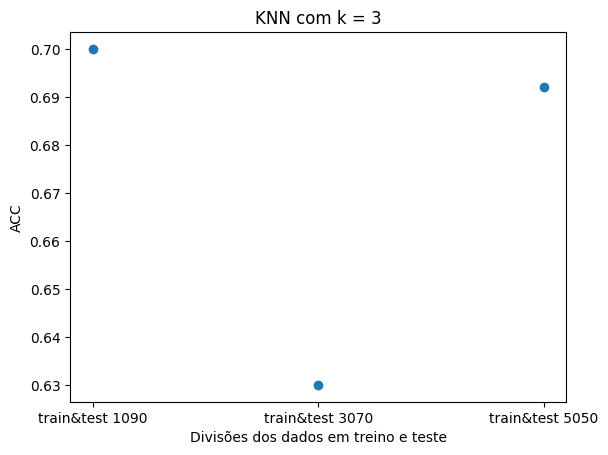

In [191]:
labels = ['train&test 1090', 'train&test 3070', 'train&test 5050']
acc = [acuracia_size01_, acuracia_3, acuracia_size005]

plt.title('KNN com k = 3')
#plt.plot(labels, acc);
#plt.bar(labels, acc);
plt.ylabel('ACC');
plt.xlabel('Divisões dos dados em treino e teste');
plt.scatter(labels, acc);